OpenCV is already installed.
Please upload your video (.mov):


Saving IMG_9677-004-720p.mov to IMG_9677-004-720p.mov
Processing video: IMG_9677-004-720p.mov
Extracted 28 frames. Displaying a few samples:


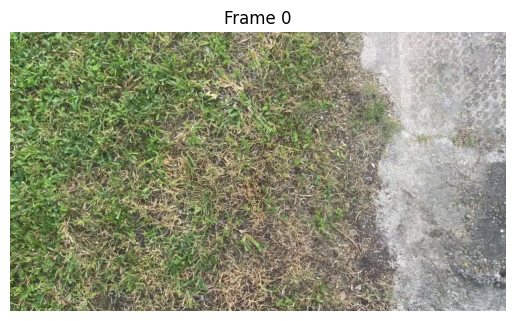

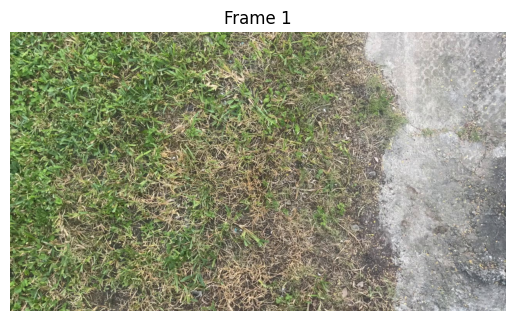

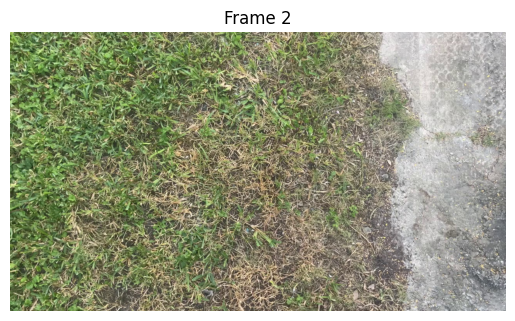

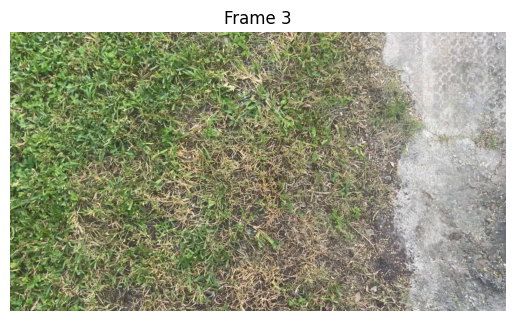

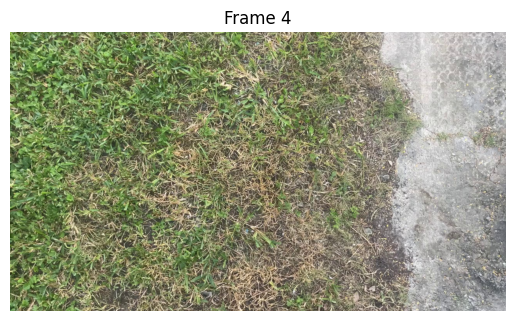

In [4]:
# Install OpenCV in Colab
try:
    import cv2
    print("OpenCV is already installed.")
except ImportError:
    print("Installing OpenCV...")
    !pip install opencv-python-headless

# Import necessary libraries
import cv2
import os
from google.colab import files
import matplotlib.pyplot as plt

# Upload the video file
print("Please upload your video (.mov):")
uploaded = files.upload()

# Get the uploaded video file name
video_path = list(uploaded.keys())[0]

# Create a folder to save extracted frames
frames_folder = "extracted_frames-0845"
os.makedirs(frames_folder, exist_ok=True)

# Open the video file
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")
else:
    print(f"Processing video: {video_path}")

# Extract frames at regular intervals (e.g., every 30 frames)
frame_rate = 30  # Change this to adjust interval
frame_number = 0
saved_frames = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Save every `frame_rate` frame
    if frame_number % frame_rate == 0:
        frame_filename = os.path.join(frames_folder, f"frame_{frame_number}.jpg")
        cv2.imwrite(frame_filename, frame)
        saved_frames.append(frame_filename)

    frame_number += 1

cap.release()

# Display a few extracted frames
print(f"Extracted {len(saved_frames)} frames. Displaying a few samples:")
for i, frame_file in enumerate(saved_frames[:5]):  # Show the first 5 frames
    frame = cv2.imread(frame_file)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display
    plt.figure()
    plt.imshow(frame)
    plt.title(f"Frame {i}")
    plt.axis('off')
    plt.show()


Displaying frames 8 to 11:


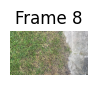

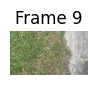

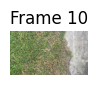

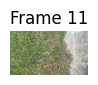

In [9]:
# Define the starting frame and number of frames to display
first_frame_to_display = 8
nbr_of_frames_to_display = 4

# Ensure the range does not exceed the number of saved frames
last_frame_to_display = min(first_frame_to_display + nbr_of_frames_to_display, len(saved_frames))

# Set the display size (width, height in inches)
display_size = (1, 1)  # Adjust this as needed

# Display the frames
print(f"Displaying frames {first_frame_to_display} to {last_frame_to_display - 1}:")
for i in range(first_frame_to_display, last_frame_to_display):
    frame_file = saved_frames[i]
    frame = cv2.imread(frame_file)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display
    plt.figure(figsize=display_size)
    plt.imshow(frame)
    plt.title(f"Frame {i}")
    plt.axis('off')
    plt.show()


In [ ]:
# Image Stitching
print("Starting image stitching...")

# Load the selected frames to stitch
frames_to_stitch = []
for i in range(first_frame_to_display, last_frame_to_display):
    frame = cv2.imread(saved_frames[i])
    frames_to_stitch.append(frame)

# Initialize the Stitcher
stitcher = cv2.Stitcher_create()

# Perform the stitching
(status, stitched_image) = stitcher.stitch(frames_to_stitch)

# Check if stitching was successful
if status == cv2.Stitcher_OK:
    print("Stitching completed successfully!")
    # Save and display the stitched image
    stitched_image_path = "stitched_image.jpg"
    cv2.imwrite(stitched_image_path, stitched_image)
    stitched_image = cv2.cvtColor(stitched_image, cv2.COLOR_BGR2RGB)  # Convert for display
    plt.figure(figsize=(10, 10))
    plt.imshow(stitched_image)
    plt.title("Stitched Image")
    plt.axis('off')
    plt.show()
else:
    print(f"Stitching failed with status code {status}.")

Starting image stitching...
